# Decision Tree

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Loading Data**

In [ ]:

# load dataset

df = pd.read_csv('/content/diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable

X = df.drop("Outcome",axis=1)
y  = df["Outcome"]

**Splitting Data**

In [ ]:
#train test split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Before applying SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Class distribution before SMOTE:
0    401
1    213
Name: Outcome, dtype: int64


**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [ ]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report_result)

Decision Tree Model Performance:
Accuracy: 0.7467532467532467

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



**Evaluating Model**

**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [ ]:
!pip install graphviz
!pip install six
!pip install pydotplus

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus



**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree classifier with the best parameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = best_clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("\nBest Decision Tree Model Performance:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report_result)




Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

Best Decision Tree Model Performance:
Accuracy: 0.7857142857142857

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



**Visualizing Decision Trees**

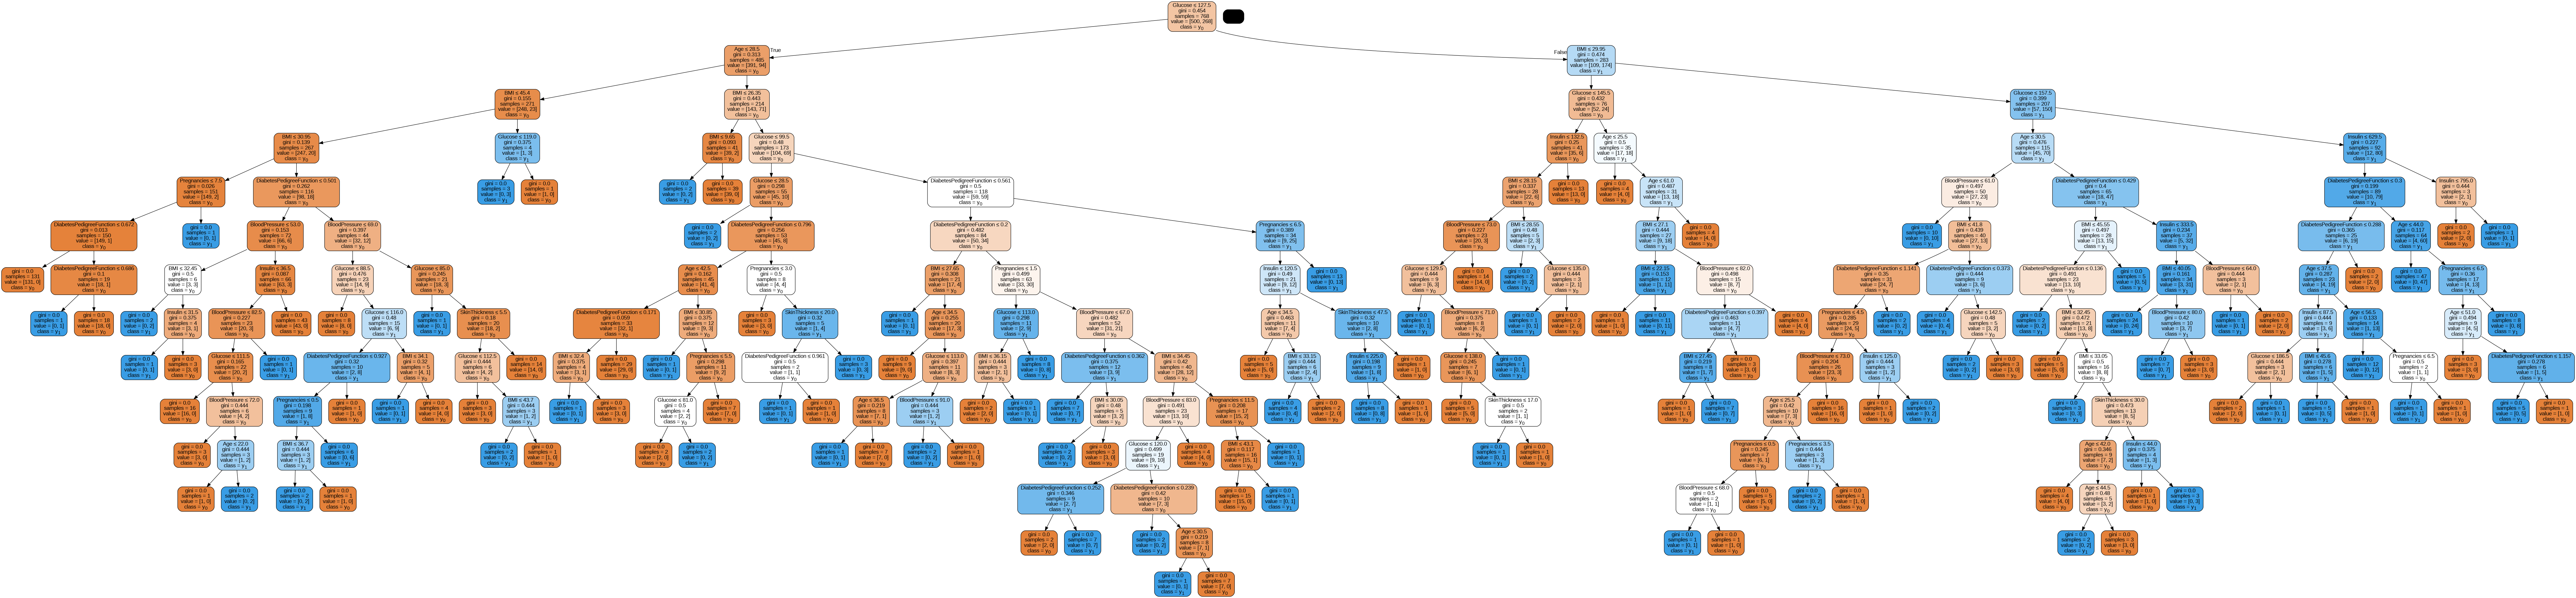

In [ ]:


from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
clf.fit(X, y)

# Visualize the Decision Tree using graphviz and pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=True,
                                filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Implement Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Create RandomForest Tree classifer object

# Train RandomForest Tree Classifer

#Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?

If the model overfitting try out different way to fix it!!

### All the best!!! I hope you will Enjoy the Task!